### Name : Reena Rajendra Prasad
### Project : Concrete Strength Prediction
##### Github : https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-Reena-R/blob/master/Concrete%20Strength%20Prediction-Reena%20Rajendra%20Prasad%20-Final.ipynb


Objective 

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

Attribute Information:
	Name	
1.	Cement 
2.	Blast Furnace Slag (slag)
3.	Fly Ash (ash)	
4.	Water(water)	
5.	Superplasticizer (superplastic)	
6.	Coarse Aggregate (coarseagg)	
7.	Fine Aggregate (fineagg)	
8.	Age(age)	[in Days]
9.	Concrete compressive strength(strength)	 	Output Variable
 

In [1]:
#import Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#Read the DataFrame
df=pd.read_csv('concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
#Check Data using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [5]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### Insights  :  Non Null Values present  

In [6]:
# Check Sahpe of the  DtaSet
df.shape

(1030, 9)

In [7]:
#Five point summary and check distribution
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


#### Insights 
 . Skewed data  in  some of the columns like Slag , Ash , age 

In [8]:
#Find out the skewness of data
df.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

In [9]:
#Check for duplicate values 
df[df.duplicated()].sort_values('cement')

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
892,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
943,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
933,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
766,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [10]:

len(df[df.duplicated()].index)

25

###  Insights 
* There are duplicate rows in the dataset , which can be dropped for model building 

In [11]:
#Drop The Duplicate  Rows 
df.drop_duplicates(subset=None, keep='last',inplace=True)

In [12]:
# Check the shape of the remaining data
df.shape

(1005, 9)

### Univariate   Analysis

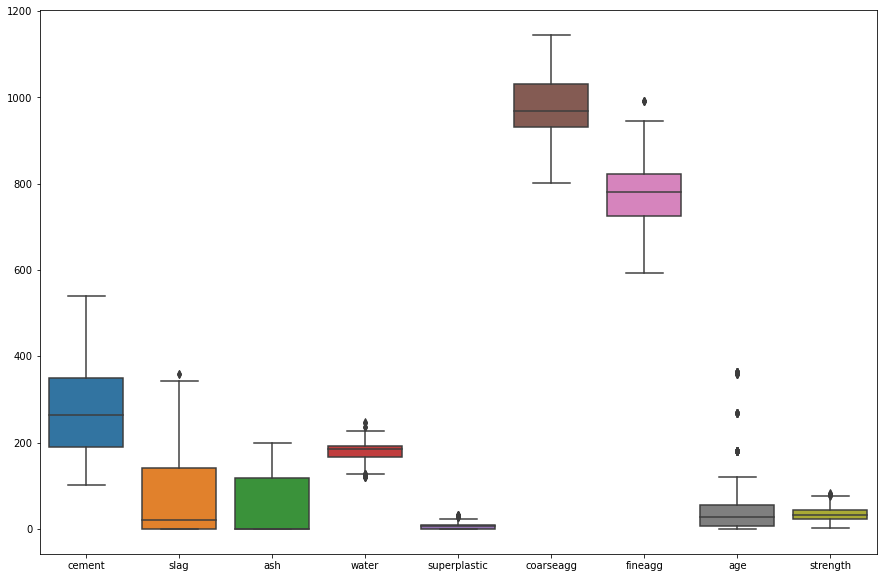

In [13]:
###X  Box Plot
ax,s =plt.subplots(figsize=(15,10))
sns.boxplot(data=df)

# Insights  
 . Outliers are present in Slag, watr , Superplastic,agge fineaggregate and strength 
 
 . Higly skewed data in Slag, Ash, Superplastic and age 

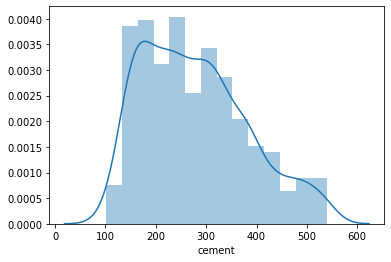

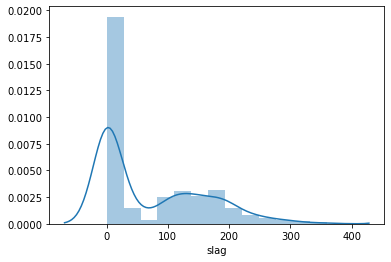

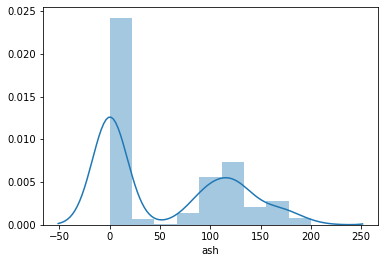

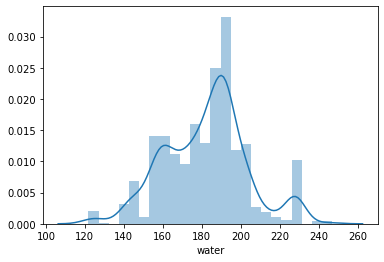

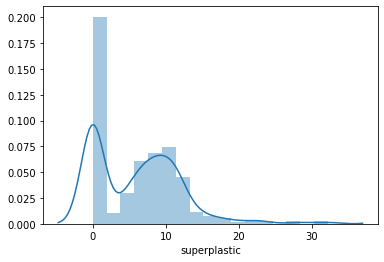

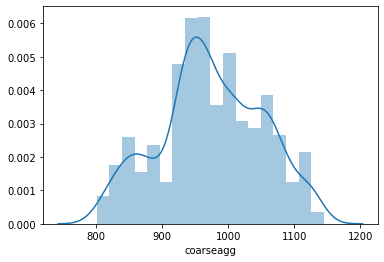

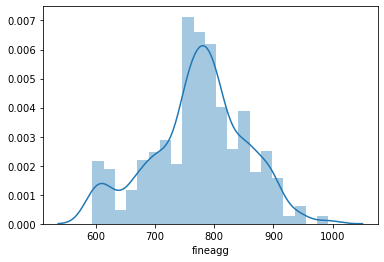

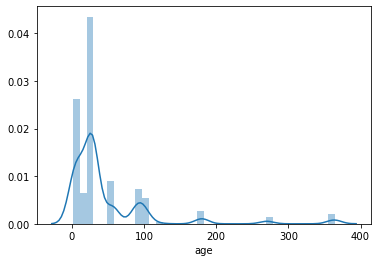

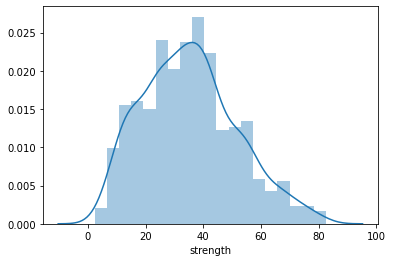

In [14]:
#Distribution PLots 

for col in df.columns:
    sns.distplot(df[col])
    plt.show()

### Outliers 

In [15]:
#InterQuartile Range  for each numerical columns
Q1=df.quantile(q=0.25)
Q3=df.quantile(q=0.75)
IQR=Q3-Q1
print(IQR)

cement          158.30
slag            142.50
ash             118.30
water            26.30
superplastic     10.00
coarseagg        99.00
fineagg          97.90
age              49.00
strength         21.35
dtype: float64


In [16]:
npout=np.where((df<(Q1-1.5*IQR))| (df>(Q3+1.5*IQR)))

npout

(array([  32,   43,   49,   62,   64,   89,   94,   98,  124,  124,  128,
         139,  144,  147,  151,  152,  154,  186,  192,  193,  201,  226,
         249,  250,  255,  256,  263,  284,  289,  294,  304,  305,  315,
         350,  352,  361,  383,  420,  434,  434,  435,  449,  451,  469,
         487,  487,  489,  519,  520,  551,  560,  563,  563,  566,  573,
         580,  598,  600,  601,  610,  620,  674,  691,  698,  699,  710,
         716,  720,  730,  731,  742,  752,  765,  792,  802,  813,  825,
         832,  832,  836,  853,  867,  875,  876,  889,  893,  894,  925,
         926,  930,  932,  946,  960,  965,  970,  978,  992, 1001, 1003],
       dtype=int64),
 array([3, 4, 7, 7, 3, 7, 7, 7, 3, 6, 7, 7, 7, 7, 4, 7, 7, 8, 7, 7, 7, 4,
        7, 8, 7, 3, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 6, 7, 3, 7, 7,
        3, 6, 8, 4, 7, 7, 7, 3, 6, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8,
        3, 4, 7, 7, 8, 7, 3, 4, 3, 4, 7, 3, 6, 7, 7, 8, 7, 7, 3, 1, 7, 8,
        7, 4, 7,

In [17]:
len(npout[0])

99

### Insights
There are Outliers in 99 Rows . Will lose about 9% of data  if outliers are removed. So keeping them for Analysis

###  BiVariate Analysis 

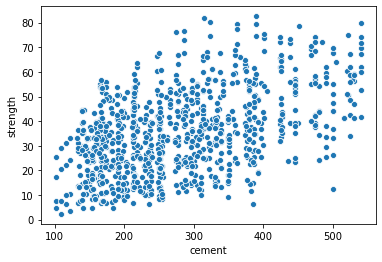

In [18]:
##  Scatterplot between Strength and cement
sns.scatterplot(data=df, x='cement',y='strength')

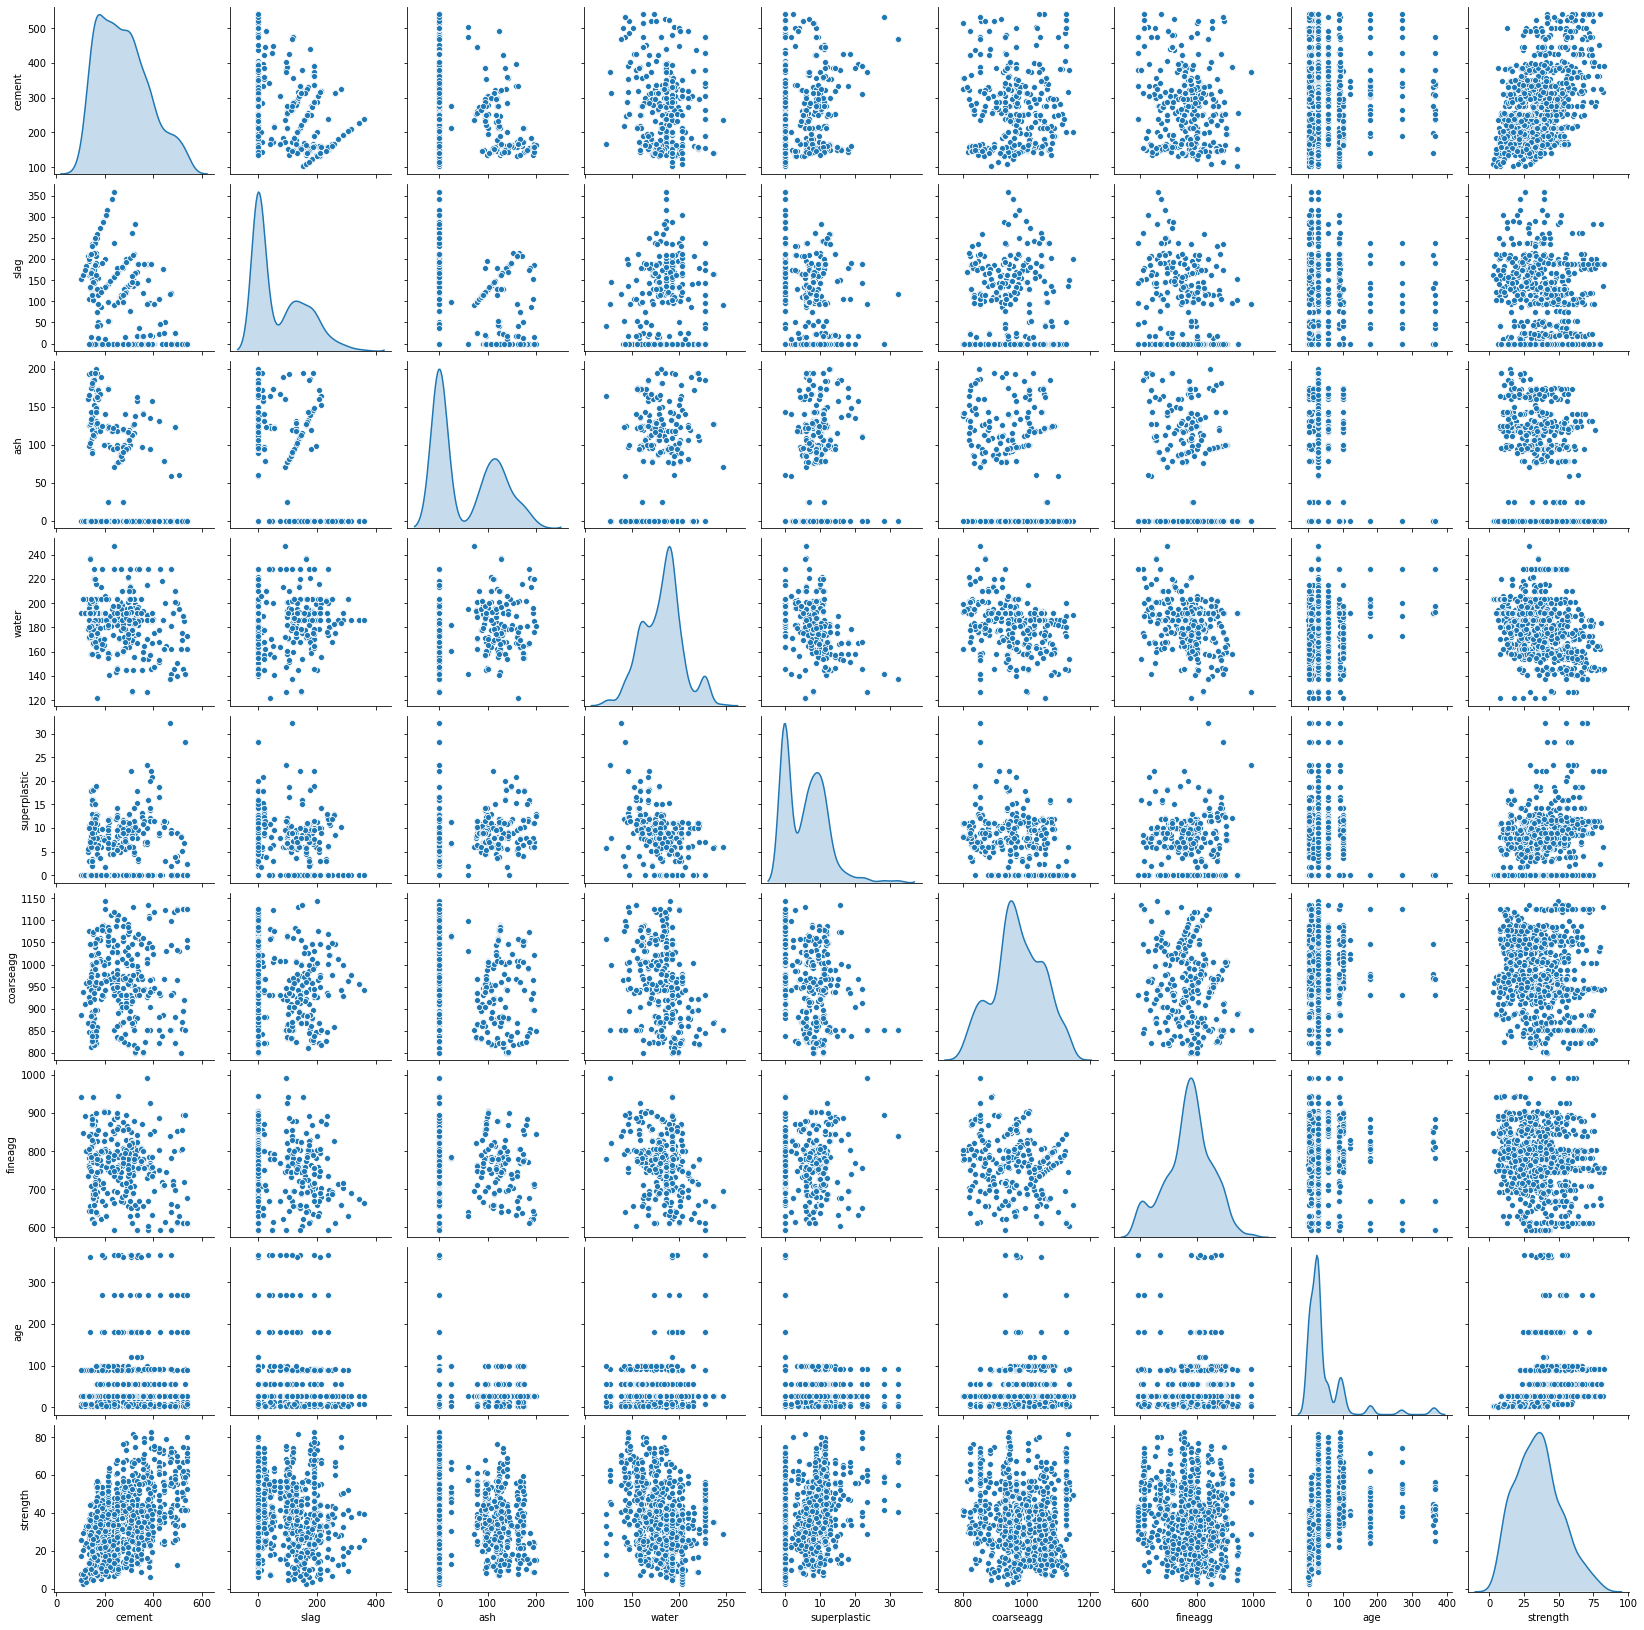

In [19]:
sns.pairplot(df,diag_kind='kde')

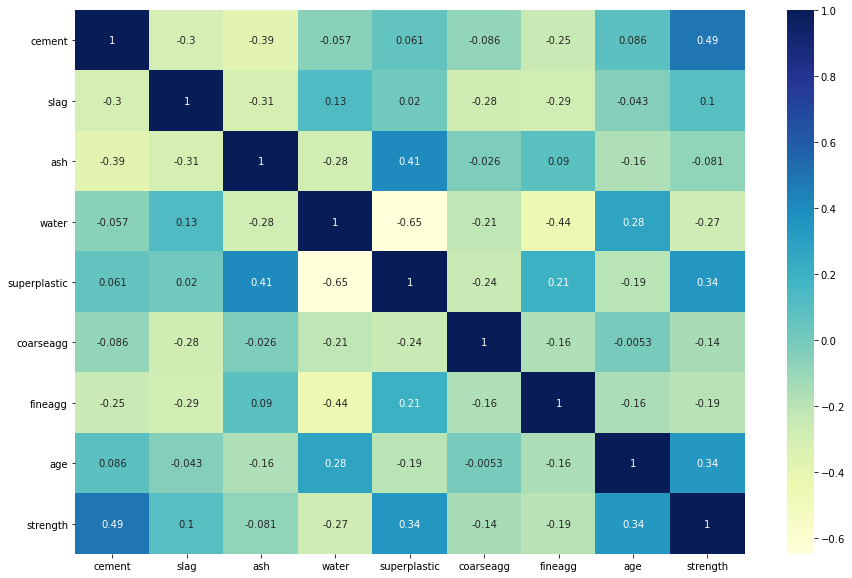

In [20]:
#to check the correlation between  the Strenth and the independent variables 
fig,ax= plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True , cmap="YlGnBu")

### Insights 
.Target variable strength is highly correlated with  cement , Superplastic and age  

.Water and superplastic has a high negative correlation

.cement and Strength has a weak linear relation

### Feature Engineering

### Introducing an new columns "water to cement Ratio" and  "cement to coarseagg ratio" , "cement to fineagg ratio"   into the dataset   - Check the correlation between strenght  and these newly introduced features


In [21]:
df_ratio = df.loc[ : ,['strength','water','cement','coarseagg','fineagg']]
df_ratio['water_cement'] = df_ratio['water']/df_ratio['cement']
df_ratio['coarseagg_cement'] = df_ratio['coarseagg']/df_ratio['cement']
df_ratio['fineagg_cement'] = df_ratio['fineagg']/df_ratio['cement']

In [22]:
df_ratio.head()

,strength,water,cement,coarseagg,fineagg,water_cement,coarseagg_cement,fineagg_cement
0,29.89,203.5,141.3,971.8,748.5,1.440198,6.877565,5.297240
1,23.51,158.3,168.9,1080.8,796.2,0.937241,6.399053,4.714032
2,29.22,187.4,250.0,956.9,861.2,0.749600,3.827600,3.444800
3,45.85,228.0,266.0,932.0,670.0,0.857143,3.503759,2.518797
4,18.29,193.3,154.8,1047.4,696.7,1.248708,6.766150,4.500646


In [23]:
df_ratio.corr()


,strength,water,cement,coarseagg,fineagg,water_cement,coarseagg_cement,fineagg_cement
strength,1.000000,-0.269624,0.488283,-0.144717,-0.186448,-0.489401,-0.469457,-0.464999
water,-0.269624,1.000000,-0.056625,-0.212480,-0.444915,0.315054,0.000364,-0.031481
cement,0.488283,-0.056625,1.000000,-0.086205,-0.245375,-0.876062,-0.920453,-0.892597
coarseagg,-0.144717,-0.212480,-0.086205,1.000000,-0.162187,-0.059537,0.218522,-0.004894
fineagg,-0.186448,-0.444915,-0.245375,-0.162187,1.000000,0.082993,0.171974,0.410062
water_cement,-0.489401,0.315054,-0.876062,-0.059537,0.082993,1.000000,0.916997,0.908593
coarseagg_cement,-0.469457,0.000364,-0.920453,0.218522,0.171974,0.916997,1.000000,0.941360
fineagg_cement,-0.464999,-0.031481,-0.892597,-0.004894,0.410062,0.908593,0.941360,1.000000


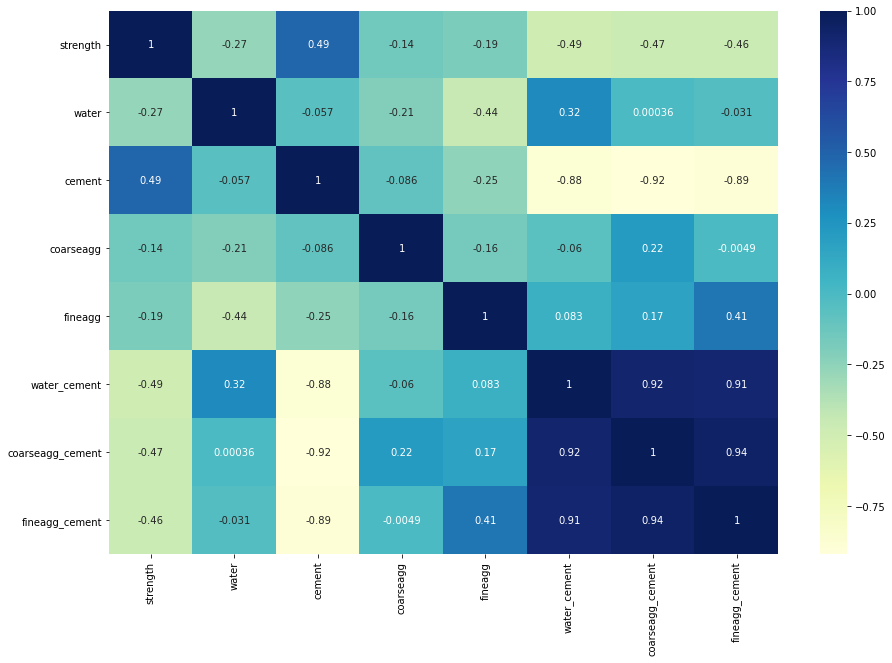

In [24]:
fig,ax= plt.subplots(figsize=(15,10))
sns.heatmap(df_ratio.corr(), annot=True , cmap="YlGnBu")

### Insights 
 . The newly created ratios seems to be highly correlated with each other
 
 . will keep water cement ratio  and use it in the model building  and compare the performance

#### Data Preparation

In [25]:
# Seperate X and Y Values
X= df.iloc[:,:-1]
Y=df.iloc[:,-1]
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


In [26]:
Y.head()

0    29.89
1    23.51
2    29.22
3    45.85
4    18.29
Name: strength, dtype: float64

In [27]:

### Split Data into Test Train  and validation Sets 
X_train,X_Rem,Y_train,Y_Rem = train_test_split(X,Y,test_size=0.3, random_state=6)
# Split the 30% data into Test and Validation 
X_test,X_val,Y_test,Y_val =train_test_split(X_Rem,Y_Rem,test_size=0.5, random_state=6)


### Prepare Data Frame with newly derived column "water_cement" ratio to Try out in the model building

In [28]:

dff=pd.concat([df,df_ratio[['water_cement']]],axis=1)
dff.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1.440198
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0.937241
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0.749600
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0.857143
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1.248708


In [29]:
dff.shape

(1005, 10)

In [30]:
X_ftr= dff.drop('strength', axis=1)
Y_ftr=dff['strength']

### Split Data into Test Train  and validation Sets 
X_train_ftr,X_Rem_ftr,Y_train_ftr,Y_Rem_ftr = train_test_split(X_ftr,Y_ftr,test_size=0.3, random_state=6)
# Split the 30% data into Test and Validation 
X_test_ftr,X_val_ftr,Y_test_ftr,Y_val_ftr =train_test_split(X_Rem_ftr,Y_Rem_ftr,test_size=0.5, random_state=6)


### complexity of the model
##### >> The given data frame is of 1005 rows after dropping the duplicates
##### >> The number of independent features present are   9  with the  introduction of a new feature water-cement ratio.
##### >> The number of data points seems to be less  for trying out very complex models using   QUadratic or polynomial features 
##### >> It is better to stick to simple linear models given the number of data points 

### Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression
# for pipeline
from sklearn.pipeline import Pipeline

#for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt

#Build a pipeLine with  Scaling of data using StandarScaler 

LR_pipeline = Pipeline([('stdscaler',StandardScaler()),('clf', LinearRegression())])
LR_pipeline.fit(X_train,Y_train)
train_score = LR_pipeline.score(X_train,Y_train)     

#Cross validation
kf=KFold(n_splits=10, random_state=2)
cs= cross_val_score(LR_pipeline,X_val,Y_val,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()
#Test Score
test_score = LR_pipeline.score(X_test,Y_test)   

#RMSE Score
Y_predict= LR_pipeline.predict(X_test)
rmse_score = mean_squared_error(Y_test,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)

resultsDf = pd.DataFrame({'Method':['Linear Regression'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev ,'RMSE' :rmse_score })


Train>>  0.5940162835384671 Test>>  0.622592842686782 CVScore>>  0.5317150091013974 Cv StdDev>>  0.3021428315431407 RMSE>>  10.259648241582802


### LinearRegression on  Data with new feature water cement Ratio

In [32]:
LR_pipeline_ftr = Pipeline([('stdscaler',StandardScaler()),('clf', LinearRegression())])
LR_pipeline_ftr.fit(X_train_ftr,Y_train_ftr)
train_score = LR_pipeline_ftr.score(X_train_ftr,Y_train_ftr)    

#Cross validation
kf=KFold(n_splits=10, random_state=2)
cs= cross_val_score(LR_pipeline_ftr,X_val_ftr,Y_val_ftr,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()
#Test Score
test_score = LR_pipeline_ftr.score(X_test_ftr,Y_test_ftr)   


#RMSE Score
Y_predict= LR_pipeline_ftr.predict(X_test_ftr)
rmse_score = mean_squared_error(Y_test_ftr,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)


tempResultsDf =  pd.DataFrame({'Method':['Linear Regression-Added Feature'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev ,'RMSE' :rmse_score  })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train R2','Test R2','CV Mean','CV Std Dev','RMSE']]

Train>>  0.595807743249859 Test>>  0.6290674299549259 CVScore>>  0.5140021757937893 Cv StdDev>>  0.3164700103097686 RMSE>>  10.17126312092128


### Linear Regression with Polynomial features 

In [33]:
from sklearn.preprocessing import PolynomialFeatures

LR_pipeline_Poly = Pipeline([('stdscaler',StandardScaler()),('poly',PolynomialFeatures(interaction_only=True, degree=2)),('clf', LinearRegression())])
LR_pipeline_Poly.fit(X_train,Y_train)
train_score = LR_pipeline_Poly.score(X_train,Y_train)   
#Cross validation
kf=KFold(n_splits=10, random_state=2)
cs= cross_val_score(LR_pipeline_Poly,X_val,Y_val,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()
#Test Score
test_score = LR_pipeline_Poly.score(X_test,Y_test)   

#RMSE Score
Y_predict= LR_pipeline_Poly.predict(X_test)
rmse_score = mean_squared_error(Y_test,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)

tempResultsDf =  pd.DataFrame({'Method':['Linear Regression-Polynomial Fr'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev ,'RMSE' :rmse_score })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train R2','Test R2','CV Mean','CV Std Dev','RMSE']]

Train>>  0.7465842179389504 Test>>  0.6902284249538094 CVScore>>  0.4881472507966823 Cv StdDev>>  0.4327142644763414 RMSE>>  9.294974163193128


### LinearRegression wit polynomial features on  Data with new feature water cement Ratio

In [34]:
LR_pipeline_Poly_ftr = Pipeline([('stdscaler',StandardScaler()),('poly',PolynomialFeatures(interaction_only=True, degree=2)),('clf', LinearRegression())])
LR_pipeline_Poly_ftr.fit(X_train_ftr,Y_train_ftr)
train_score = LR_pipeline_Poly_ftr.score(X_train_ftr,Y_train_ftr)  

#Cross validation
kf=KFold(n_splits=10, random_state=2)
cs= cross_val_score(LR_pipeline_Poly_ftr,X_val_ftr,Y_val_ftr,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()
#Test Score

test_score = LR_pipeline_Poly_ftr.score(X_test_ftr,Y_test_ftr)  


#RMSE Score
Y_predict= LR_pipeline_Poly_ftr.predict(X_test_ftr)
rmse_score = mean_squared_error(Y_test_ftr,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)

tempResultsDf =  pd.DataFrame({'Method':['Linear Regression-Polynomial_Added Feature'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev,'RMSE' :rmse_score  })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train R2','Test R2','CV Mean','CV Std Dev','RMSE']]

Train>>  0.755281443421832 Test>>  0.676454242913076 CVScore>>  -0.3920492362405805 Cv StdDev>>  2.2121632183933277 RMSE>>  9.499379966868513


### Lasso  Regression

In [35]:
from sklearn.linear_model import Lasso

LSS_pipeline = Pipeline([('stdscaler',StandardScaler()),('clf', Lasso())])
LSS_pipeline.fit(X_train,Y_train)
train_score = LSS_pipeline.score(X_train,Y_train)   

#Cross validation
kf=KFold(n_splits=10, random_state=2)
cs= cross_val_score(LSS_pipeline,X_val,Y_val,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()
#Test Score

test_score = LSS_pipeline.score(X_test,Y_test)   


#RMSE Score
Y_predict= LSS_pipeline.predict(X_test)
rmse_score = mean_squared_error(Y_test,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)


tempResultsDf =  pd.DataFrame({'Method':['Lasso'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev,'RMSE' :rmse_score  })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train R2','Test R2','CV Mean','CV Std Dev','RMSE']]

Train>>  0.5423061068409528 Test>>  0.5686938613285113 CVScore>>  0.5252241789692377 Cv StdDev>>  0.2536090048894486 RMSE>>  10.967817734478137


### Lasso on  Data with new feature water cement Ratio

In [36]:
LSS_pipeline_ftr = Pipeline([('stdscaler',StandardScaler()),('clf', LinearRegression())])
LSS_pipeline_ftr.fit(X_train_ftr,Y_train_ftr)
train_score = LSS_pipeline_ftr.score(X_train_ftr,Y_train_ftr) 
#Cross validation
kf=KFold(n_splits=10, random_state=2)
cs= cross_val_score(LSS_pipeline_ftr,X_val_ftr,Y_val_ftr,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()
#Test Score
test_score = LSS_pipeline_ftr.score(X_test_ftr,Y_test_ftr)   


#RMSE Score
Y_predict= LSS_pipeline_ftr.predict(X_test_ftr)
rmse_score = mean_squared_error(Y_test_ftr,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)

tempResultsDf =  pd.DataFrame({'Method':['Lasso-Added Feature'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev ,'RMSE' :rmse_score })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train R2','Test R2','CV Mean','CV Std Dev','RMSE']]

Train>>  0.595807743249859 Test>>  0.6290674299549259 CVScore>>  0.5140021757937893 Cv StdDev>>  0.3164700103097686 RMSE>>  10.17126312092128


### Decision Tree 

In [37]:
from sklearn.tree import  DecisionTreeRegressor
DT_pipeline = Pipeline([('stdscaler',StandardScaler()),('clf', DecisionTreeRegressor())])
DT_pipeline.fit(X_train,Y_train)
train_score = DT_pipeline.score(X_train,Y_train)   

#Cross validation
kf=KFold(n_splits=10, random_state=2)
cs= cross_val_score(DT_pipeline,X_val,Y_val,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()
#Test Score

test_score = DT_pipeline.score(X_test,Y_test)   

#RMSE Score
Y_predict= DT_pipeline.predict(X_test)
rmse_score = mean_squared_error(Y_test,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)

tempResultsDf =  pd.DataFrame({'Method':['Decision Tree'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev ,'RMSE' :rmse_score  })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train R2','Test R2','CV Mean','CV Std Dev','RMSE']]

Train>>  0.9989617913783159 Test>>  0.8418013596400737 CVScore>>  0.5530777321566881 Cv StdDev>>  0.24203224492705766 RMSE>>  6.642457406513872


### Decision Tree  on  Data with new feature water cement Ratio

In [38]:
DT_pipeline_ftr = Pipeline([('stdscaler',StandardScaler()),('clf', DecisionTreeRegressor())])
DT_pipeline_ftr.fit(X_train_ftr,Y_train_ftr)
train_score = DT_pipeline_ftr.score(X_train_ftr,Y_train_ftr)  
#Cross validation
kf=KFold(n_splits=10, random_state=2)
cs= cross_val_score(DT_pipeline_ftr,X_val_ftr,Y_val_ftr,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()
#Test Score
test_score = DT_pipeline_ftr.score(X_test_ftr,Y_test_ftr)   



#RMSE Score
Y_predict= DT_pipeline_ftr.predict(X_test_ftr)
rmse_score = mean_squared_error(Y_test_ftr,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)

tempResultsDf =  pd.DataFrame({'Method':['Decision Tree-Added Feature'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev ,'RMSE' :rmse_score })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train R2','Test R2','CV Mean','CV Std Dev','RMSE']]

Train>>  0.9989617913783159 Test>>  0.8362054641346867 CVScore>>  0.49763983639518494 Cv StdDev>>  0.3351318148166962 RMSE>>  6.758916945646373


### Ada Boost

In [39]:
from sklearn.ensemble import AdaBoostRegressor
Ada_pipeline = Pipeline([('stdscaler',StandardScaler()),('clf', AdaBoostRegressor())])
Ada_pipeline.fit(X_train,Y_train)
train_score = Ada_pipeline.score(X_train,Y_train) 
#Cross validation
kf=KFold(n_splits=10, random_state=2)
cs= cross_val_score(Ada_pipeline,X_val,Y_val,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()
#Test Score
test_score = Ada_pipeline.score(X_test,Y_test) 

#RMSE Score
Y_predict= Ada_pipeline.predict(X_test)
rmse_score = mean_squared_error(Y_test,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)

tempResultsDf =  pd.DataFrame({'Method':['Ada Boost'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev ,'RMSE' :rmse_score })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train R2','Test R2','CV Mean','CV Std Dev','RMSE']]

Train>>  0.8101471463373233 Test>>  0.825493766592583 CVScore>>  0.7439126465251042 Cv StdDev>>  0.13151651476007292 RMSE>>  6.97642415785431


### Ada boost on  Data with new feature water cement Ratio

In [40]:
Ada_pipeline_ftr = Pipeline([('stdscaler',StandardScaler()),('clf', AdaBoostRegressor())])
Ada_pipeline_ftr.fit(X_train_ftr,Y_train_ftr)
train_score = Ada_pipeline_ftr.score(X_train_ftr,Y_train_ftr)  
#Cross validation
kf=KFold(n_splits=10, random_state=2)
cs= cross_val_score(Ada_pipeline_ftr,X_val_ftr,Y_val_ftr,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()
#Test Score
test_score = Ada_pipeline_ftr.score(X_test_ftr,Y_test_ftr)   

#RMSE Score
Y_predict= Ada_pipeline_ftr.predict(X_test_ftr)
rmse_score = mean_squared_error(Y_test_ftr,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)


tempResultsDf =  pd.DataFrame({'Method':['Ada Boost-Added Feature'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev,'RMSE' :rmse_score  })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train R2','Test R2','CV Mean','CV Std Dev','RMSE']]

Train>>  0.816481898452388 Test>>  0.8169334677025177 CVScore>>  0.7673547233553213 Cv StdDev>>  0.10336361577659024 RMSE>>  7.145487807017093


### Random Forest 

In [41]:
from sklearn.ensemble import RandomForestRegressor
RF_pipeline = Pipeline([('stdscaler',StandardScaler()),('clf', RandomForestRegressor())])
RF_pipeline.fit(X_train,Y_train)
train_score = RF_pipeline.score(X_train,Y_train)  
#Cross validation
kf=KFold(n_splits=10, random_state=2)
cs= cross_val_score(RF_pipeline,X_val,Y_val,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()
#Test Score
test_score = RF_pipeline.score(X_test,Y_test)   


#RMSE Score
Y_predict= RF_pipeline.predict(X_test)
rmse_score = mean_squared_error(Y_test,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)




tempResultsDf =  pd.DataFrame({'Method':['Random Forest'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev ,'RMSE' :rmse_score  })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train R2','Test R2','CV Mean','CV Std Dev','RMSE']]

Train>>  0.9825585499432102 Test>>  0.9239868039053527 CVScore>>  0.7823227070853198 Cv StdDev>>  0.1208155993702183 RMSE>>  4.604387876146606


### Random Forest on  Data with new feature water cement Ratio

In [42]:
RF_pipeline_ftr = Pipeline([('stdscaler',StandardScaler()),('clf', RandomForestRegressor())])
RF_pipeline_ftr.fit(X_train_ftr,Y_train_ftr)
train_score = RF_pipeline_ftr.score(X_train_ftr,Y_train_ftr)    
#Cross validation
kf=KFold(n_splits=10, random_state=2)
cs= cross_val_score(RF_pipeline_ftr,X_val_ftr,Y_val_ftr,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()
#Test Score
test_score = RF_pipeline_ftr.score(X_test_ftr,Y_test_ftr)   


#RMSE Score
Y_predict= RF_pipeline_ftr.predict(X_test_ftr)
rmse_score = mean_squared_error(Y_test_ftr,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)


tempResultsDf =  pd.DataFrame({'Method':['Random Forest-Added Feature'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev,'RMSE' :rmse_score  })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train R2','Test R2','CV Mean','CV Std Dev','RMSE']]

Train>>  0.9842698267807427 Test>>  0.9290662234717771 CVScore>>  0.794199505380221 Cv StdDev>>  0.09803998955993867 RMSE>>  4.447889056700118


### Gradient Boost

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
Grd_pipeline = Pipeline([('stdscaler',StandardScaler()),('clf', GradientBoostingRegressor())])
Grd_pipeline.fit(X_train,Y_train)
train_score = Grd_pipeline.score(X_train,Y_train)    
#Cross validation
kf=KFold(n_splits=10, random_state=2)
cs= cross_val_score(Grd_pipeline,X_val,Y_val,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()
#Test Score
test_score = Grd_pipeline.score(X_test,Y_test)   


#RMSE Score
Y_predict= Grd_pipeline.predict(X_test)
rmse_score = mean_squared_error(Y_test,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)




tempResultsDf =  pd.DataFrame({'Method':['Gradient Boost'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev ,'RMSE' :rmse_score  })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train R2','Test R2','CV Mean','CV Std Dev','RMSE']]

Train>>  0.945290219449155 Test>>  0.9136354014781786 CVScore>>  0.8441221127744406 Cv StdDev>>  0.08946221412770508 RMSE>>  4.907895241538639


### Gradient Boost new feature water cement Ratio

In [44]:

Grd_pipeline_ftr = Pipeline([('stdscaler',StandardScaler()),('clf', GradientBoostingRegressor())])
Grd_pipeline_ftr.fit(X_train_ftr,Y_train_ftr)
train_score = Grd_pipeline_ftr.score(X_train_ftr,Y_train_ftr)     
#Cross validation
kf=KFold(n_splits=10, random_state=2)
cs= cross_val_score(Grd_pipeline_ftr,X_val_ftr,Y_val_ftr,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()
#Test Score
test_score = Grd_pipeline_ftr.score(X_test_ftr,Y_test_ftr)   

#RMSE Score
Y_predict= Grd_pipeline_ftr.predict(X_test_ftr)
rmse_score = mean_squared_error(Y_test_ftr,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)




tempResultsDf =  pd.DataFrame({'Method':['Gradient Boost-Added Feature'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev,'RMSE' :rmse_score  })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train R2','Test R2','CV Mean','CV Std Dev','RMSE']]

Train>>  0.9470455295128509 Test>>  0.9103712020521204 CVScore>>  0.8370673802237152 Cv StdDev>>  0.07781397463446939 RMSE>>  4.999783407217082


### KNN

In [45]:
from sklearn.neighbors import KNeighborsRegressor
KNN_pipeline = Pipeline([('stdscaler',StandardScaler()),('clf', KNeighborsRegressor())])
KNN_pipeline.fit(X_train,Y_train)
train_score = KNN_pipeline.score(X_train,Y_train)  
#Cross validation
kf=KFold(n_splits=10, random_state=2)
cs= cross_val_score(KNN_pipeline,X_val,Y_val,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()
#Test Score
test_score = KNN_pipeline.score(X_test,Y_test)   

#RMSE Score
Y_predict= KNN_pipeline.predict(X_test)
rmse_score = mean_squared_error(Y_test,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)




tempResultsDf =  pd.DataFrame({'Method':['KNN'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev ,'RMSE' :rmse_score  })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train R2','Test R2','CV Mean','CV Std Dev','RMSE']]

Train>>  0.7792899859401945 Test>>  0.6836033758709442 CVScore>>  0.5371519280223801 Cv StdDev>>  0.14894570426747378 RMSE>>  9.393843604663331


### KNN Data with new feature water cement Ratio

In [46]:
KNN_pipeline_ftr = Pipeline([('stdscaler',StandardScaler()),('clf', KNeighborsRegressor())])
KNN_pipeline_ftr.fit(X_train_ftr,Y_train_ftr)
train_score = KNN_pipeline_ftr.score(X_train_ftr,Y_train_ftr)   
#Cross validation
kf=KFold(n_splits=10, random_state=2)
cs= cross_val_score(KNN_pipeline_ftr,X_val_ftr,Y_val_ftr,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()
#Test Score
test_score = KNN_pipeline_ftr.score(X_test_ftr,Y_test_ftr)   



#RMSE Score
Y_predict= KNN_pipeline_ftr.predict(X_test_ftr)
rmse_score = mean_squared_error(Y_test_ftr,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)


      
tempResultsDf =  pd.DataFrame({'Method':['KNN-Added Feature'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev,'RMSE' :rmse_score  })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train R2','Test R2','CV Mean','CV Std Dev','RMSE']]

Train>>  0.7812961532201819 Test>>  0.6780795926129555 CVScore>>  0.5312652028733527 Cv StdDev>>  0.1432348492881254 RMSE>>  9.475489599610032


In [47]:
resultsDf.head(20).sort_values(['CV Mean','Test R2','Train R2'], ascending=False).reset_index(drop=True)

,Method,Train R2,Test R2,CV Mean,CV Std Dev,RMSE
0,Gradient Boost,0.945290,0.913635,0.844122,0.089462,4.907895
1,Gradient Boost-Added Feature,0.947046,0.910371,0.837067,0.077814,4.999783
2,Random Forest-Added Feature,0.984270,0.929066,0.794200,0.098040,4.447889
3,Random Forest,0.982559,0.923987,0.782323,0.120816,4.604388
4,Ada Boost-Added Feature,0.816482,0.816933,0.767355,0.103364,7.145488
5,Ada Boost,0.810147,0.825494,0.743913,0.131517,6.976424
6,Decision Tree,0.998962,0.841801,0.553078,0.242032,6.642457
7,KNN,0.779290,0.683603,0.537152,0.148946,9.393844
8,Linear Regression,0.594016,0.622593,0.531715,0.302143,10.259648
9,KNN-Added Feature,0.781296,0.678080,0.531265,0.143235,9.475490


#### Model - Summary

##### >>  In the different  Basic Models tried out , Gradient Boost is having the highest cross validation Score  and Low  cross validation Standard Deviation

##### >>The second highest  score  is by the basic Random Forest Model

##### >> Introduced new feature water- cement ratio, which does not improve the model too much. Here the cross validation accuracy also reduced 

##### >>Tried out the complex model using Linear regression Polynomial Features , but the score has reduced drastically. Given the size of dataset arount 100 rows , if we add polynomial features it seems to be suffering from curse of dimensionality


### Hyper Parameter Tuning  for Gradient boost

### Grid search CV 


In [49]:
Grd_pipeline.get_params()

{'memory': None,
 'steps': [('stdscaler', StandardScaler()),
  ('clf', GradientBoostingRegressor())],
 'verbose': False,
 'stdscaler': StandardScaler(),
 'clf': GradientBoostingRegressor(),
 'stdscaler__copy': True,
 'stdscaler__with_mean': True,
 'stdscaler__with_std': True,
 'clf__alpha': 0.9,
 'clf__ccp_alpha': 0.0,
 'clf__criterion': 'friedman_mse',
 'clf__init': None,
 'clf__learning_rate': 0.1,
 'clf__loss': 'ls',
 'clf__max_depth': 3,
 'clf__max_features': None,
 'clf__max_leaf_nodes': None,
 'clf__min_impurity_decrease': 0.0,
 'clf__min_impurity_split': None,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 2,
 'clf__min_weight_fraction_leaf': 0.0,
 'clf__n_estimators': 100,
 'clf__n_iter_no_change': None,
 'clf__presort': 'deprecated',
 'clf__random_state': None,
 'clf__subsample': 1.0,
 'clf__tol': 0.0001,
 'clf__validation_fraction': 0.1,
 'clf__verbose': 0,
 'clf__warm_start': False}

In [156]:
from sklearn.model_selection import GridSearchCV

### Split Data into Train and Test 
X_traincv,X_testcv,Y_traincv,Y_testcv = train_test_split(X,Y,test_size=0.3, random_state=6)

Gscv_pipeline = Pipeline([('stdscaler',StandardScaler()),('clf', GradientBoostingRegressor())])
params ={'clf__learning_rate':[.01,.1,.2,.3] ,'clf__min_samples_leaf':[10,5,2] ,'clf__min_samples_split':[2,4,6],'clf__n_estimators':[100,250,200],'clf__random_state':[6]}
Gscv=GridSearchCV(Gscv_pipeline,param_grid=params,cv=10)
Gscv.fit(X_traincv,Y_traincv)

print (Gscv.score(X_testcv,Y_testcv))

0.9342785655604826


In [157]:
Gscv.best_score_

0.9129383895882706

In [125]:
Gscv.best_params_

{'clf__learning_rate': 0.3,
 'clf__min_samples_leaf': 5,
 'clf__min_samples_split': 2,
 'clf__n_estimators': 250,
 'clf__random_state': 6}

### Gradiant Boost with the Best parameters from Gridsearch CV

In [48]:

### Split Data into Test Train  and validation Sets 
X_train_best,X_test_best,Y_train_best,Y_test_best = train_test_split(X,Y,test_size=0.3, random_state=6)
GrdBest_pipeline = Pipeline([('stdscaler',StandardScaler()),('clf', GradientBoostingRegressor(learning_rate= 0.3,min_samples_leaf=5,min_samples_split=6,n_estimators=250, random_state=6))])
GrdBest_pipeline.fit(X_train_best,Y_train_best)
train_score = GrdBest_pipeline.score(X_train_best,Y_train_best)    

#Cross validation
kf=KFold(n_splits=10, random_state=6)
cs= cross_val_score(GrdBest_pipeline,X_train_best,Y_train_best,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()

test_score = GrdBest_pipeline.score(X_test_best,Y_test_best)   


#RMSE Score
Y_predict= GrdBest_pipeline.predict(X_test_best)
rmse_score = mean_squared_error(Y_test_best,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)


Train>>  0.9888813690457474 Test>>  0.9342785655604826 CVScore>>  0.9129383895882706 Cv StdDev>>  0.01923352199465701 RMSE>>  4.240518040829636


In [49]:
      
tempResultsDf =  pd.DataFrame({'Method':['Gradient Boost_GridSearch'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev,'RMSE' :rmse_score  })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train R2','Test R2','CV Mean','CV Std Dev','RMSE']]

### Hyper Parameter Tuning  for Random Forest Using RandomizedSerach CV

In [128]:
RF_pipeline.get_params()

{'memory': None,
 'steps': [('stdscaler', StandardScaler()), ('clf', RandomForestRegressor())],
 'verbose': False,
 'stdscaler': StandardScaler(),
 'clf': RandomForestRegressor(),
 'stdscaler__copy': True,
 'stdscaler__with_mean': True,
 'stdscaler__with_std': True,
 'clf__bootstrap': True,
 'clf__ccp_alpha': 0.0,
 'clf__criterion': 'mse',
 'clf__max_depth': None,
 'clf__max_features': 'auto',
 'clf__max_leaf_nodes': None,
 'clf__max_samples': None,
 'clf__min_impurity_decrease': 0.0,
 'clf__min_impurity_split': None,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 2,
 'clf__min_weight_fraction_leaf': 0.0,
 'clf__n_estimators': 100,
 'clf__n_jobs': None,
 'clf__oob_score': False,
 'clf__random_state': None,
 'clf__verbose': 0,
 'clf__warm_start': False}

In [129]:
from sklearn.model_selection import RandomizedSearchCV

### Split Data into Train and Test 
X_traincv,X_testcv,Y_traincv,Y_testcv = train_test_split(X,Y,test_size=0.3, random_state=6)

Rscv_pipeline = Pipeline([('stdscaler',StandardScaler()),('clf', RandomForestRegressor())])
params_grd ={'clf__bootstrap':[True,False] ,'clf__max_features':['auto','sqrt'] ,'clf__min_samples_split':[2,4,6],'clf__min_samples_leaf':[2,4,6], \
             'clf__n_estimators':[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],'clf__random_state':[6], \
            'clf__max_depth':[int(x) for x in np.linspace(10, 100, num = 10)]+ [None]}

Rscv=RandomizedSearchCV(Rscv_pipeline,param_distributions=params_grd,cv=10)
Rscv.fit(X_traincv,Y_traincv)



RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('stdscaler', StandardScaler()),
                                             ('clf', RandomForestRegressor())]),
                   param_distributions={'clf__bootstrap': [True, False],
                                        'clf__max_depth': [10, 20, 30, 40, 50,
                                                           60, 70, 80, 90, 100,
                                                           None],
                                        'clf__max_features': ['auto', 'sqrt'],
                                        'clf__min_samples_leaf': [2, 4, 6],
                                        'clf__min_samples_split': [2, 4, 6],
                                        'clf__n_estimators': [200, 400, 600,
                                                              800, 1000, 1200,
                                                              1400, 1600, 1800,
                                                 

In [130]:
print (Rscv.score(X_testcv,Y_testcv))

0.8981394080638061


In [131]:
Rscv.best_score_

0.8521205830166778

In [132]:
Rscv.best_params_

{'clf__random_state': 6,
 'clf__n_estimators': 2000,
 'clf__min_samples_split': 6,
 'clf__min_samples_leaf': 4,
 'clf__max_features': 'auto',
 'clf__max_depth': 50,
 'clf__bootstrap': True}

### Random Forest with the Best parameters from RandomizedSearchCV

In [50]:
RFBest_pipeline = Pipeline([('stdscaler',StandardScaler()),('clf', \
    RandomForestRegressor(bootstrap= True,max_depth= 50,max_features= 'auto',min_samples_leaf=2,min_samples_split=6,n_estimators=2000, random_state=6))])
RFBest_pipeline.fit(X_train_best,Y_train_best)
train_score = RFBest_pipeline.score(X_train_best,Y_train_best)    


#Cross validation
kf=KFold(n_splits=10, random_state=6)
cs= cross_val_score(RFBest_pipeline,X_train_best,Y_train_best,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()

test_score = RFBest_pipeline.score(X_test_best,Y_test_best)   

#RMSE Score
Y_predict= RFBest_pipeline.predict(X_test_best)
rmse_score = mean_squared_error(Y_test_best,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)


Train>>  0.9640302544239291 Test>>  0.9121820757915977 CVScore>>  0.8670868889132572 Cv StdDev>>  0.03224675005717676 RMSE>>  4.901815739087091


In [80]:
tempResultsDf =  pd.DataFrame({'Method':['Random Forest_RandomSearchCV'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev,'RMSE' :rmse_score  })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train R2','Test R2','CV Mean','CV Std Dev','RMSE']]


### Random Forest with the Best parameters from RandomizedSearchCV  - On Data with Water_cement Ratio

In [51]:
from sklearn.model_selection import RandomizedSearchCV

### Split Data into Train and Test 
X_traincv,X_testcv,Y_traincv,Y_testcv = train_test_split(X_ftr,Y_ftr,test_size=0.3, random_state=6)

Rscv_pipeline = Pipeline([('stdscaler',StandardScaler()),('clf', RandomForestRegressor())])
params_grd ={'clf__bootstrap':[True,False] ,'clf__max_features':['auto','sqrt'] ,'clf__min_samples_split':[2,4,6],'clf__min_samples_leaf':[2,4,6], \
             'clf__n_estimators':[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],'clf__random_state':[6], \
            'clf__max_depth':[int(x) for x in np.linspace(10, 100, num = 10)]+ [None]}

Rscv=RandomizedSearchCV(Rscv_pipeline,param_distributions=params_grd,cv=10)
Rscv.fit(X_traincv,Y_traincv)


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('stdscaler', StandardScaler()),
                                             ('clf', RandomForestRegressor())]),
                   param_distributions={'clf__bootstrap': [True, False],
                                        'clf__max_depth': [10, 20, 30, 40, 50,
                                                           60, 70, 80, 90, 100,
                                                           None],
                                        'clf__max_features': ['auto', 'sqrt'],
                                        'clf__min_samples_leaf': [2, 4, 6],
                                        'clf__min_samples_split': [2, 4, 6],
                                        'clf__n_estimators': [200, 400, 600,
                                                              800, 1000, 1200,
                                                              1400, 1600, 1800,
                                                 

In [52]:
Rscv.best_score_

0.8758459294318669

In [53]:
Rscv.best_params_

{'clf__random_state': 6,
 'clf__n_estimators': 400,
 'clf__min_samples_split': 2,
 'clf__min_samples_leaf': 2,
 'clf__max_features': 'auto',
 'clf__max_depth': 30,
 'clf__bootstrap': True}

### Random Forest with the Best parameters from RandomizedSearchCV - with water_cement Ratio

In [54]:
RFBest_pipeline = Pipeline([('stdscaler',StandardScaler()),('clf', \
    RandomForestRegressor(bootstrap= True,max_depth= 30,max_features= 'auto',min_samples_leaf=2,min_samples_split=2,n_estimators=400, random_state=6))])
RFBest_pipeline.fit(X_train_best,Y_train_best)
train_score = RFBest_pipeline.score(X_train_best,Y_train_best)    


#Cross validation
kf=KFold(n_splits=10, random_state=6)
cs= cross_val_score(RFBest_pipeline,X_train_best,Y_train_best,cv=kf, scoring='r2')

cvScore =cs.mean()
cvSTdDev = cs.std()

test_score = RFBest_pipeline.score(X_test_best,Y_test_best)   

#RMSE Score
Y_predict= RFBest_pipeline.predict(X_test_best)
rmse_score = mean_squared_error(Y_test_best,Y_predict,squared=False)

print("Train>> ",train_score ,"Test>> ",test_score , "CVScore>> ",cvScore ,"Cv StdDev>> " ,cvSTdDev , "RMSE>> "  ,rmse_score)


Train>>  0.9704466775075441 Test>>  0.9141625559989447 CVScore>>  0.8702654071881637 Cv StdDev>>  0.031564880921409556 RMSE>>  4.8462273790663835


In [55]:
tempResultsDf =  pd.DataFrame({'Method':['Random ForestAddedFeature__RandomSearchCV'], 'Train R2':train_score, 'Test R2': test_score ,'CV Mean' :cvScore,'CV Std Dev' :cvSTdDev,'RMSE' :rmse_score  })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train R2','Test R2','CV Mean','CV Std Dev','RMSE']]


In [56]:
resultsDf=resultsDf.head(20).sort_values(['Test R2','RMSE'], ascending=False).reset_index(drop=True)

In [57]:
resultsDf

,Method,Train R2,Test R2,CV Mean,CV Std Dev,RMSE
0,Gradient Boost_GridSearch,0.988881,0.934279,0.912938,0.019234,4.240518
1,Random Forest-Added Feature,0.984270,0.929066,0.794200,0.098040,4.447889
2,Random Forest,0.982559,0.923987,0.782323,0.120816,4.604388
3,Random ForestAddedFeature__RandomSearchCV,0.970447,0.914163,0.870265,0.031565,4.846227
4,Gradient Boost,0.945290,0.913635,0.844122,0.089462,4.907895
5,Gradient Boost-Added Feature,0.947046,0.910371,0.837067,0.077814,4.999783
6,Decision Tree,0.998962,0.841801,0.553078,0.242032,6.642457
7,Decision Tree-Added Feature,0.998962,0.836205,0.497640,0.335132,6.758917
8,Ada Boost,0.810147,0.825494,0.743913,0.131517,6.976424
9,Ada Boost-Added Feature,0.816482,0.816933,0.767355,0.103364,7.145488



## Gradient Boost has a Score of 93.08%  in Test Data

## Random Forest  has a Score of 91.74%  in Test Data

### R2  Comparison for all Models

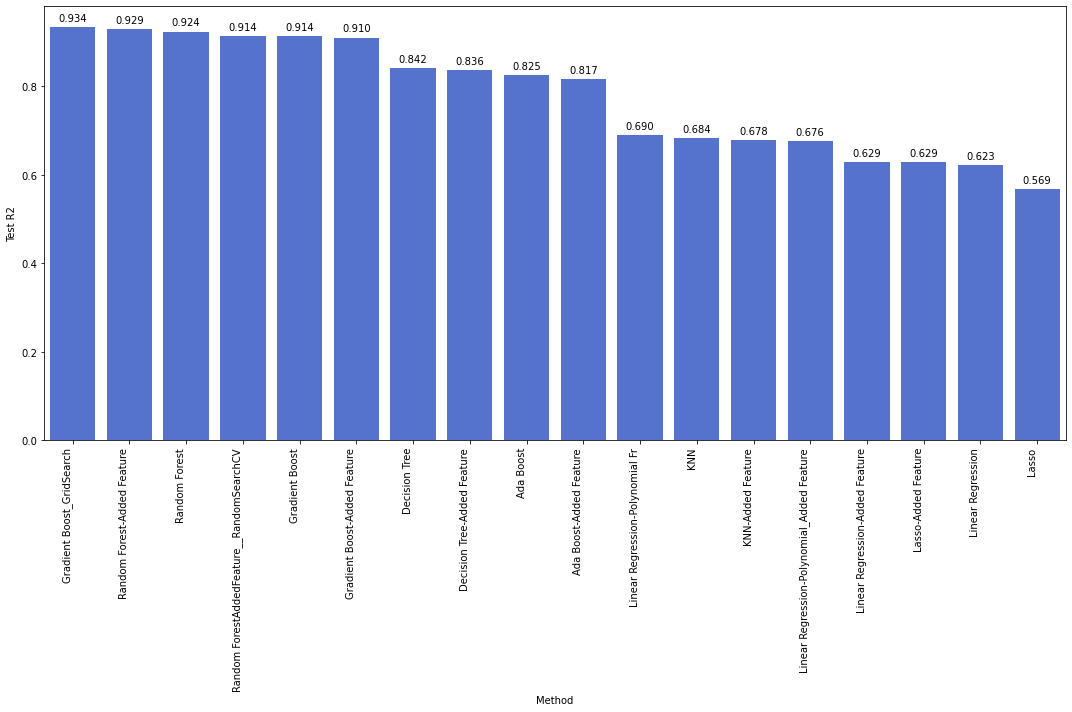

In [58]:
plt.figure(figsize=(15,10))
barp= sns.barplot(data=resultsDf , x='Method',y='Test R2',color="RoyalBlue")
barp.set_xticklabels(barp.get_xticklabels(), rotation=90, ha="right")
for p in barp.patches:
    barp.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.tight_layout()
plt.show()

### RMSE  Comparison for all Models

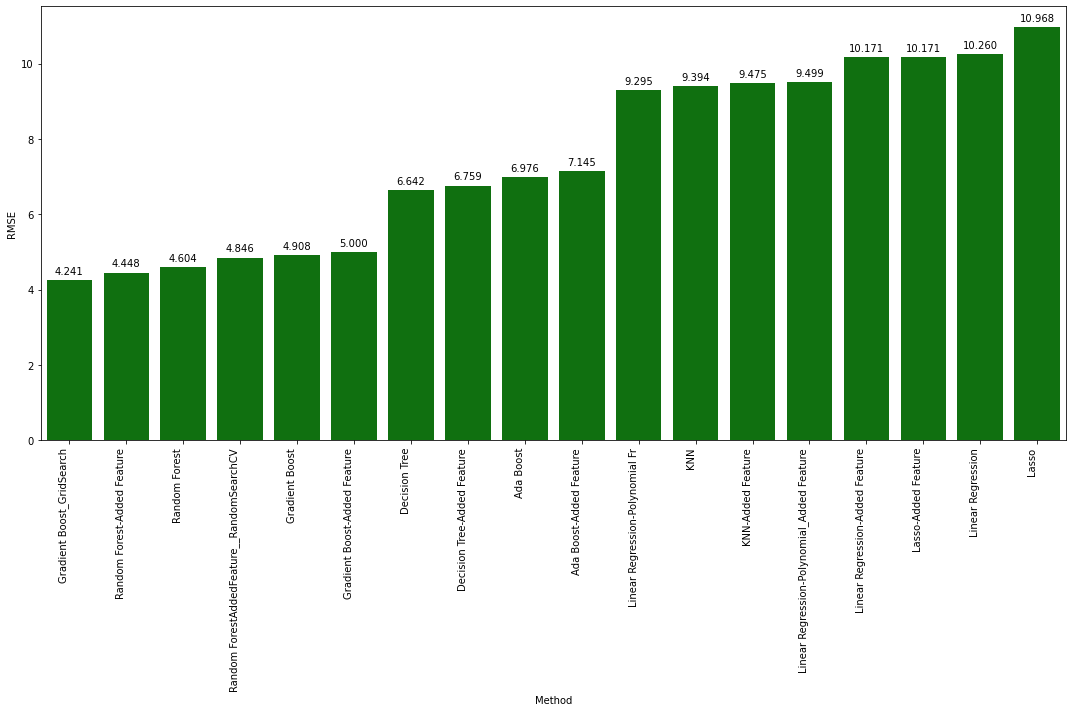

In [59]:
plt.figure(figsize=(15,10))
barp= sns.barplot(data=resultsDf , x='Method',y='RMSE',color="Green")
barp.set_xticklabels(barp.get_xticklabels(), rotation=90, ha="right")
for p in barp.patches:
    barp.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.tight_layout()
plt.show()

### - Gradient Boost is the best model according to the analysis